In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils import class_weight

In [2]:
DataFrame = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn_preprocessed.csv")
DataFrame.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [3]:
X=DataFrame.drop(columns=['Exited'],axis=1)
Y=DataFrame['Exited']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
ANN = tf.keras.models.Sequential()

In [8]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weights_dict = dict(enumerate(class_weights))

In [9]:
ANN = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)

In [11]:
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
ANN.fit(X_train_scaled, Y_train,
        batch_size=64, epochs=200,
        validation_data=(X_test_scaled, Y_test),
        callbacks=[early_stop, lr_reduce],
        class_weight=class_weights_dict)

Epoch 1/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5858 - loss: 0.8826 - val_accuracy: 0.7000 - val_loss: 0.7191 - learning_rate: 0.0010
Epoch 2/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6898 - loss: 0.7158 - val_accuracy: 0.7032 - val_loss: 0.6591 - learning_rate: 0.0010
Epoch 3/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7016 - loss: 0.6488 - val_accuracy: 0.7136 - val_loss: 0.6256 - learning_rate: 0.0010
Epoch 4/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7238 - loss: 0.6057 - val_accuracy: 0.7160 - val_loss: 0.6023 - learning_rate: 0.0010
Epoch 5/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7266 - loss: 0.5780 - val_accuracy: 0.7512 - val_loss: 0.5489 - learning_rate: 0.0010
Epoch 6/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7607 - loss: 0.5557 - val_accuracy: 0.7392 - val_loss: 0.5543 - learning_rate: 0.0010
Epoch 7/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7554 - loss: 0.

In [13]:
# Convert probabilities to binary (0 or 1)
ANN_pred_train = (ANN.predict(X_train_scaled) > 0.5).astype("int32")
ANN_pred_test = (ANN.predict(X_test_scaled) > 0.65).astype("int32")

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
from sklearn.metrics import f1_score ,accuracy_score, precision_score, recall_score, confusion_matrix

#f1_score
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,ANN_pred_train))
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,ANN_pred_test))


# Accuracy
print("Train Accuracy:", accuracy_score(Y_train, ANN_pred_train))
print("Test Accuracy:", accuracy_score(Y_test, ANN_pred_test))

# Precision & Recall
print("Test Precision:", precision_score(Y_test, ANN_pred_test))
print("Test Recall:", recall_score(Y_test, ANN_pred_test))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, ANN_pred_test))


Training Set Evaluation F1-Score=> 0.6217187068250898
Testing Set Evaluation F1-Score=> 0.633816425120773
Train Accuracy: 0.8174666666666667
Test Accuracy: 0.8484
Test Precision: 0.623574144486692
Test Recall: 0.6444007858546169
Confusion Matrix:
 [[1793  198]
 [ 181  328]]


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC AUC Score: 0.8678


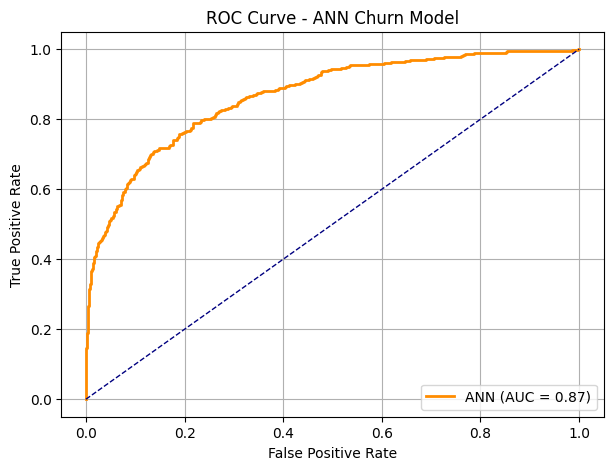

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict test probabilities
y_probs = ANN.predict(X_test_scaled)

# ROC AUC
auc = roc_auc_score(Y_test, y_probs)
print("ROC AUC Score:", round(auc, 4))

# Compute ROC
fpr, tpr, _ = roc_curve(Y_test, y_probs)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ANN (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN Churn Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [16]:
# Save entire model to a single HDF5 file
ANN.save('Ann_model.h5')